#                               PROJET IA MASTER 1 BIG DATA ET MANAGEMENT

Poroni and Elvis  est une entreprise privée aux États-Unis. En raison de la croissance remarquable de l'industrie des taxi au cours des dernières années et de plusieurs acteurs clés du marché, d'énormes investissements sont prévus et, conformément à sa stratégie Go-to-Market (plan d'action d'entreprise, visant à procéder avec succès au lancement d'un produit ou service. Sa démarche consiste à mobiliser les ressources internes et externes d'une entreprise pour augmenter le taux de réussite de l'opération), ils souhaitent comprendre le marché avant de prendre décision finale.
Les investisseurs souhaitent utiliser vos informations afin d'identifier la bonne entreprise pour réaliser leur investissement.

Base de données
4 ensembles de données individuelles ont été fournies. La périodedes enrégistrement va du 31/01/2016 au 31/12/2018. Vous trouverez ci-dessous la liste des ensembles de données fournies pour l'analyse :

Cab_Data.csv - ce fichier contient les détails de la transaction pour 2 compagnies de taxi

Customer_ID.csv - il s'agit d'une table de mappage qui contient un identifiant unique reliant les détails démographiques du client

Transaction_ID.csv - il s'agit d'une table de mappage qui contient le mappage de la transaction au client et le mode de paiement

City.csv - ce fichier contient la liste des villes américaines, leur population et le nombre d'utilisateurs de taxi

Tout d'abord nous allons importer les librairies nécessaires

In [1]:
#from google.colab import drive
#drive.mount("/content/drive")

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#os.chdir("/content/drive/MyDrive/DataSets/DataSets")
os.chdir("./DataSets_Week_2-main")

In [2]:
#Visualisation et analyse du fichier Cab_Data.
cab = pd.read_csv("Cab_data.csv")
cab.info()
cab.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


(359392, 7)

In [3]:
# Visualisons le nombre de données manquantes pour chaque variable
cab.isna().sum()


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [10]:
#Affichons les premières lignes du Dataframe 
print(cab.head(10))

   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     08-01-2016  Pink Cab  ATLANTA GA         30.45   
1        10000012     06-01-2016  Pink Cab  ATLANTA GA         28.62   
2        10000013     02-01-2016  Pink Cab  ATLANTA GA          9.04   
3        10000014     07-01-2016  Pink Cab  ATLANTA GA         33.17   
4        10000015     03-01-2016  Pink Cab  ATLANTA GA          8.73   
5        10000016     07-01-2016  Pink Cab  ATLANTA GA          6.06   
6        10000017     03-01-2016  Pink Cab   AUSTIN TX         44.00   
7        10000018     07-01-2016  Pink Cab   AUSTIN TX         35.65   
8        10000019     12-01-2016  Pink Cab   BOSTON MA         14.40   
9        10000020     06-01-2016  Pink Cab   BOSTON MA         10.89   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
5        

In [4]:
#On se sent effrayé par la manière dont la date a été enrégistrée. Du coup on va visualiser cette colonne
print(cab["Date of Travel"].dtypes)
# On peut remarquer que le format n'est pas celui indiqué pour indiquer la date.
# Nous allons donc le convertir

int64


In [7]:
# Importons premièrement le package nécessaire pour effectuer cette conversion

In [5]:
from datetime import datetime, timedelta

In [6]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date



In [7]:
cab['Date of Travel']=cab['Date of Travel'].apply(lambda x:to_date_format(x))

In [8]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
# revisualisons le type de la variable "Date of Travel"
print(cab['Date of Travel'].dtypes)

datetime64[ns]


In [13]:
# On peut classifier nos données en fonction de la date par ordre croissant

In [4]:
cab = cab.sort_values(by = ['Date of Travel'])

cab = cab.reset_index(drop = True )

print(cab.shape)
cab.head(10)

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10136329,01-01-2017,Yellow Cab,WASHINGTON DC,23.28,522.73,284.9472
1,10132568,01-01-2017,Yellow Cab,BOSTON MA,11.22,215.50,153.4896
2,10132560,01-01-2017,Yellow Cab,BOSTON MA,29.76,511.36,407.1168
3,10132555,01-01-2017,Yellow Cab,BOSTON MA,32.19,592.27,459.6732
4,10132554,01-01-2017,Yellow Cab,BOSTON MA,10.26,205.68,144.0504
5,10132550,01-01-2017,Yellow Cab,BOSTON MA,28.34,510.90,350.2824
6,10132545,01-01-2017,Yellow Cab,BOSTON MA,2.91,53.34,40.1580
7,10132544,01-01-2017,Yellow Cab,BOSTON MA,10.53,201.04,135.2052
8,10132537,01-01-2017,Yellow Cab,BOSTON MA,4.08,84.91,58.7520
9,10132532,01-01-2017,Yellow Cab,BOSTON MA,36.40,636.52,436.8000


In [15]:
# On peut faire une visions statistique élémentaire globale sur notre jeu de données avec la fonction roun pour plus joli
round(cab.describe(include = 'all'))

C:\Users\Admin\AppData\Local\Temp/ipykernel_13724/470114121.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  round(cab.describe(include = 'all'))


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,359392.0,359392,359392,359392,359392.0,359392.0,359392.0
unique,NaN,1095,2,19,NaN,NaN,NaN
top,NaN,2018-01-04 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,10220761.0,NaN,NaN,NaN,23.0,423.0,286.0
std,126806.0,NaN,NaN,NaN,12.0,274.0,158.0
min,10000011.0,NaN,NaN,NaN,2.0,16.0,19.0
25%,10110810.0,NaN,NaN,NaN,12.0,206.0,151.0


In [12]:
print("\nFeature's datatypes\n\n{}".format(cab.dtypes))


Feature's datatypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


In [13]:

print('Cab dataset has {} entries , {} features'.format(cab.shape[0] ,cab.shape[1]))

Cab dataset has 359392 entries , 7 features


Visualisation du fichier City.csv

In [5]:
city = pd.read_csv("City.csv")
print(city.info())
print(city.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None
(20, 3)


In [6]:
city.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [21]:
# On remarque la présence des virgules entre les valeurs des variables Population et Users.
# Pour cela nous allons les transormer en float afin de ne pas avoir d'ennuie lors de l'élaboration des calculs statistiques

In [7]:
city['Population'] = [x.replace(',','') for x in city['Population']]
city['Users'] = [x.replace(',','') for x in city['Users']]
city['Population'] = city['Population'].astype(float)
city['Users'] = city['Users'].astype(float)

In [8]:
city.head(10)

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0
5,ORANGE COUNTY,1030185.0,12994.0
6,SAN DIEGO CA,959307.0,69995.0
7,PHOENIX AZ,943999.0,6133.0
8,DALLAS TX,942908.0,22157.0
9,ATLANTA GA,814885.0,24701.0


In [18]:
# On peut maintenant vérifier si le type a effectivement changer
city.dtypes

City           object
Population    float64
Users         float64
dtype: object

Visualisation du fichier Customer_ID.csv

In [9]:
customer = pd.read_csv("Customer_ID.csv")
print(customer.head(15))
print("\n \n{}".format(customer.dtypes))

    Customer ID Gender  Age  Income (USD/Month)
0         29290   Male   28               10813
1         27703   Male   27                9237
2         28712   Male   53               11242
3         28020   Male   23               23327
4         27182   Male   33                8536
5         27318   Male   25               13984
6         33788   Male   23               23788
7         34106   Male   19               19980
8         59799   Male   33               19271
9         57982   Male   57                5068
10        58774   Male   20               23602
11        58627   Male   28               27338
12        59007   Male   63                6683
13        58215   Male   25                6862
14        59372   Male   53                4912

 
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object


 Visualisation du fichier Transaction_ID.csv file  

In [10]:
transaction = pd.read_csv("Transaction_ID.csv")
print(transaction.head(15))
print(transaction.shape)

    Transaction ID  Customer ID Payment_Mode
0         10000011        29290         Card
1         10000012        27703         Card
2         10000013        28712         Cash
3         10000014        28020         Cash
4         10000015        27182         Card
5         10000016        27318         Cash
6         10000017        33788         Card
7         10000018        34106         Card
8         10000019        59799         Cash
9         10000020        57982         Cash
10        10000021        58774         Cash
11        10000022        58627         Card
12        10000023        59007         Card
13        10000024        58215         Cash
14        10000025        59372         Cash
(440098, 3)


In [19]:
print("\n \n{}".format(transaction.dtypes) )


 
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


# On peut maintenant fusionner nos 4 Datasets en un seul afin d'avoir une vue générale des données

 Pour ce faire, afin d'avoir face à nous toutes les colonnes, on va afficher
juste les premières lignes de chacun de nos 4 datasets.

In [11]:
cab.head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10136329,01-01-2017,Yellow Cab,WASHINGTON DC,23.28,522.73,284.9472


In [32]:
customer.head(1)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813


In [33]:
city.head(1)

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0


In [12]:
transaction.head(1)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card


In [13]:
principal= cab.merge(transaction, on="Transaction ID").merge(city, on= "City").merge(customer, on= "Customer ID")

print("Le Dataframe principal  {} enrégistrements, {} colonnes, {} valeurs manquantes".format(principal.shape[0], principal.shape[1],principal.isna().sum().sum()))

principal.dtypes

Le Dataframe principal  359392 enrégistrements, 14 colonnes, 0 valeurs manquantes


Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Population            float64
Users                 float64
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

In [14]:
#replacing spaces with '_' in column names 

for column in principal.columns:
    if ' ' in column:
        principal = principal.rename(columns={column:column.replace(' ','_')})


In [15]:
# Converted some columns from object to category or int64 datatypes to work with appropriate ones.
# Converted Data of Travel column to datetime object.

principal['Date_of_Travel'] = pd.to_datetime(principal['Date_of_Travel'])

for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    
        principal[column] = principal[column].astype('category')
        
        
for column in ["Population", "Users" ] :
    
        principal[column] = principal[column].astype('int64')

## Etudes et analyses statistiques

Nous passons maintenant aux différentes études statistiques. Nous nnous concentrons plus sur les différentes thématiques: Distribution, Valeurs abérantes, Correlation, Covariance...

Avant de tout commencer, on va visualiser le dataset principal et effectuer les dernières opérations de nettoyage telles ques: Renommer les features dans le but d'éliminer les espaces, Se rassurer des types de données si elles sont en ligne avec les attentes et principes de la statistique.

In [16]:
principal.head(10)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Population,Users,Gender,Age,Income_(USD/Month)
0,10136329,2017-01-01,Yellow Cab,WASHINGTON DC,23.28,522.73,284.9472,52983,Card,418859,127001,Male,24,32171
1,10253016,2017-01-11,Yellow Cab,WASHINGTON DC,44.80,813.70,607.4880,52983,Cash,418859,127001,Male,24,32171
2,10299396,2018-03-02,Yellow Cab,WASHINGTON DC,9.80,178.38,119.9520,52983,Card,418859,127001,Male,24,32171
3,10358659,2018-03-08,Yellow Cab,WASHINGTON DC,36.36,571.98,506.1312,52983,Card,418859,127001,Male,24,32171
4,10001379,2016-07-01,Yellow Cab,WASHINGTON DC,39.55,708.82,517.3140,52983,Card,418859,127001,Male,24,32171
5,10240617,2017-08-10,Yellow Cab,WASHINGTON DC,25.20,550.10,347.7600,52983,Card,418859,127001,Male,24,32171
6,10240614,2017-10-13,Yellow Cab,WASHINGTON DC,44.40,977.88,628.7040,52983,Card,418859,127001,Male,24,32171
7,10123910,2016-12-14,Yellow Cab,WASHINGTON DC,39.24,593.52,522.6768,52983,Card,418859,127001,Male,24,32171
8,10004202,2016-01-16,Yellow Cab,WASHINGTON DC,14.95,325.69,197.3400,52983,Cash,418859,127001,Male,24,32171
9,10415868,2018-11-19,Yellow Cab,WASHINGTON DC,24.50,366.66,323.4000,52983,Cash,418859,127001,Male,24,32171


In [17]:
principal.dtypes

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                     category
City                        category
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                category
Population                     int64
Users                          int64
Gender                      category
Age                            int64
Income_(USD/Month)             int64
dtype: object

Maintenant que tout est bon, on peut faire une première visualisation graphique



Text(0.5, 0, 'Cout par trajet')

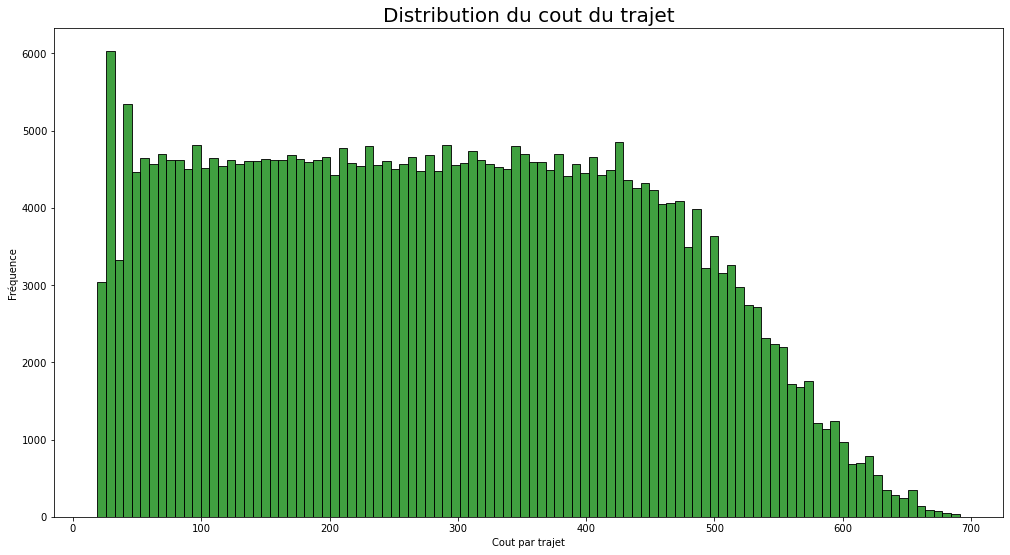

In [18]:
plt.figure(figsize=(17,9))
sns.histplot(data= principal,x="Cost_of_Trip",bins=100 , color= 'green')
plt.title('Distribution du cout du trajet', fontsize=20)
plt.ylabel('Fréquence')
plt.xlabel('Cout par trajet')

On peut maintenant diviser le Dataset en deux (en fonction du type d'entreprise (Pink et Yellow)

In [19]:
groups = principal.groupby(principal.Company)

In [20]:
pink = groups.get_group("Pink Cab")
yellow = groups.get_group("Yellow Cab")

In [35]:
pink.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Population,Users,Gender,Age,Income_(USD/Month)
19,10132362,2017-01-01,Pink Cab,WASHINGTON DC,26.19,408.45,301.185,51936,Card,418859,127001,Male,28,8731
38,10132361,2017-01-01,Pink Cab,WASHINGTON DC,8.96,120.34,95.872,51539,Card,418859,127001,Female,35,20939
40,10020577,2016-03-04,Pink Cab,WASHINGTON DC,20.16,242.26,225.792,51539,Cash,418859,127001,Female,35,20939
48,10132344,2017-01-01,Pink Cab,WASHINGTON DC,5.70,79.60,58.140,51965,Cash,418859,127001,Male,25,21317
53,10043309,2016-11-06,Pink Cab,WASHINGTON DC,34.50,415.42,396.750,51965,Cash,418859,127001,Male,25,21317


In [26]:
# Premièrement visualisons quelques informations statistiques des deux différents datasets
pink.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Population,Users,Age,Income (USD/Month)
count,8.471100e+04,84711.000000,84711.000000,84711.000000,84711.000000,8.471100e+04,84711.000000,84711.000000,84711.000000
mean,1.022394e+07,22.559917,310.800856,248.148682,18422.581577,2.350642e+06,125590.813330,35.322414,15059.047137
std,1.261782e+05,12.231092,181.995661,135.403345,18084.830799,2.734890e+06,94593.433659,12.644780,7991.077762
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,2.489680e+05,3643.000000,18.000000,2000.000000
25%,1.011014e+07,12.000000,159.970000,131.868000,5317.500000,8.148850e+05,27247.000000,25.000000,8371.000000
50%,1.022590e+07,22.440000,298.060000,246.330000,8876.000000,1.595037e+06,144132.000000,33.000000,14713.000000
75%,1.033642e+07,32.960000,441.505000,360.180000,27190.000000,1.955130e+06,164468.000000,42.000000,21055.000000
max,1.043762e+07,48.000000,1623.480000,576.000000,60000.000000,8.405837e+06,302149.000000,65.000000,35000.000000


In [21]:
yellow.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Population,Users,Gender,Age,Income_(USD/Month)
0,10136329,2017-01-01,Yellow Cab,WASHINGTON DC,23.28,522.73,284.9472,52983,Card,418859,127001,Male,24,32171
1,10253016,2017-01-11,Yellow Cab,WASHINGTON DC,44.80,813.70,607.4880,52983,Cash,418859,127001,Male,24,32171
2,10299396,2018-03-02,Yellow Cab,WASHINGTON DC,9.80,178.38,119.9520,52983,Card,418859,127001,Male,24,32171
3,10358659,2018-03-08,Yellow Cab,WASHINGTON DC,36.36,571.98,506.1312,52983,Card,418859,127001,Male,24,32171
4,10001379,2016-07-01,Yellow Cab,WASHINGTON DC,39.55,708.82,517.3140,52983,Card,418859,127001,Male,24,32171


In [22]:
yellow.describe()

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Population,Users,Age,Income_(USD/Month)
count,2.746810e+05,274681.000000,274681.000000,274681.000000,274681.000000,2.746810e+05,274681.000000,274681.000000,274681.000000
mean,1.021978e+07,22.569517,458.181990,297.922004,19428.831732,3.373228e+06,168473.246981,35.341112,15045.669817
std,1.269829e+05,12.234298,288.386166,162.548986,21830.791423,3.439014e+06,100570.558886,12.578625,7962.727062
min,1.000038e+07,1.900000,20.730000,22.800000,1.000000,2.489680e+05,3643.000000,18.000000,2000.000000
25%,1.011084e+07,11.990000,226.680000,158.400000,2403.000000,6.712380e+05,80021.000000,25.000000,8439.000000
50%,1.021987e+07,22.440000,425.060000,295.596000,6445.000000,1.595037e+06,144132.000000,33.000000,14676.000000
75%,1.032939e+07,32.960000,633.880000,432.432000,38916.000000,8.405837e+06,302149.000000,42.000000,21023.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,8.405837e+06,302149.000000,65.000000,34996.000000


<AxesSubplot:xlabel='Income_(USD/Month)', ylabel='Count'>

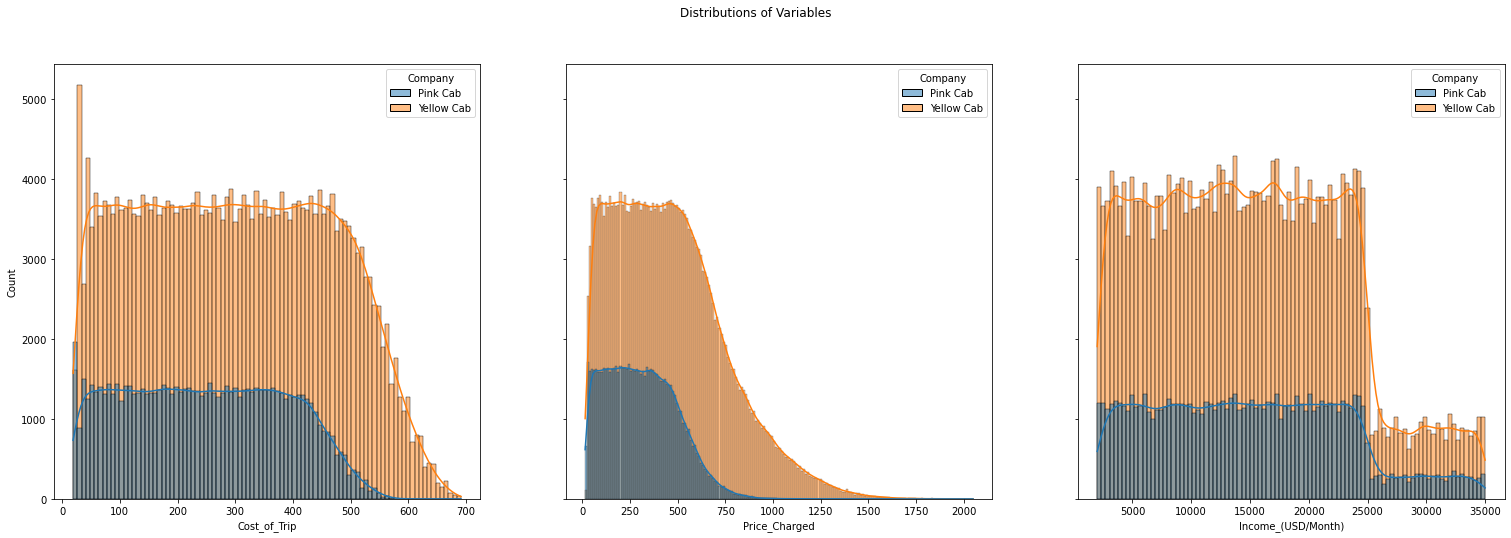

In [23]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 3 , figsize=(26,8), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=principal , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=principal , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[2], data=principal , x='Income_(USD/Month)' , kde = True , hue="Company") 

<AxesSubplot:xlabel='KM_Travelled', ylabel='Count'>

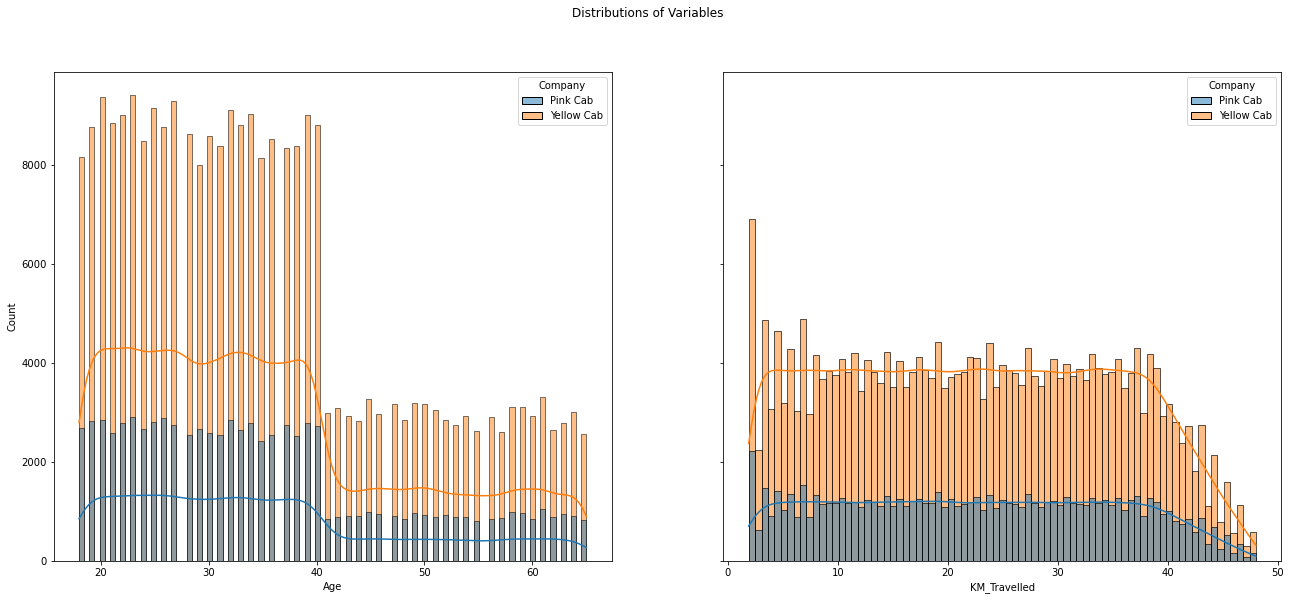

In [24]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 2 ,figsize=(22,9), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0],data=principal , x='Age' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=principal , x='KM_Travelled' , kde = True , hue="Company")

<AxesSubplot:xlabel='Users', ylabel='Count'>

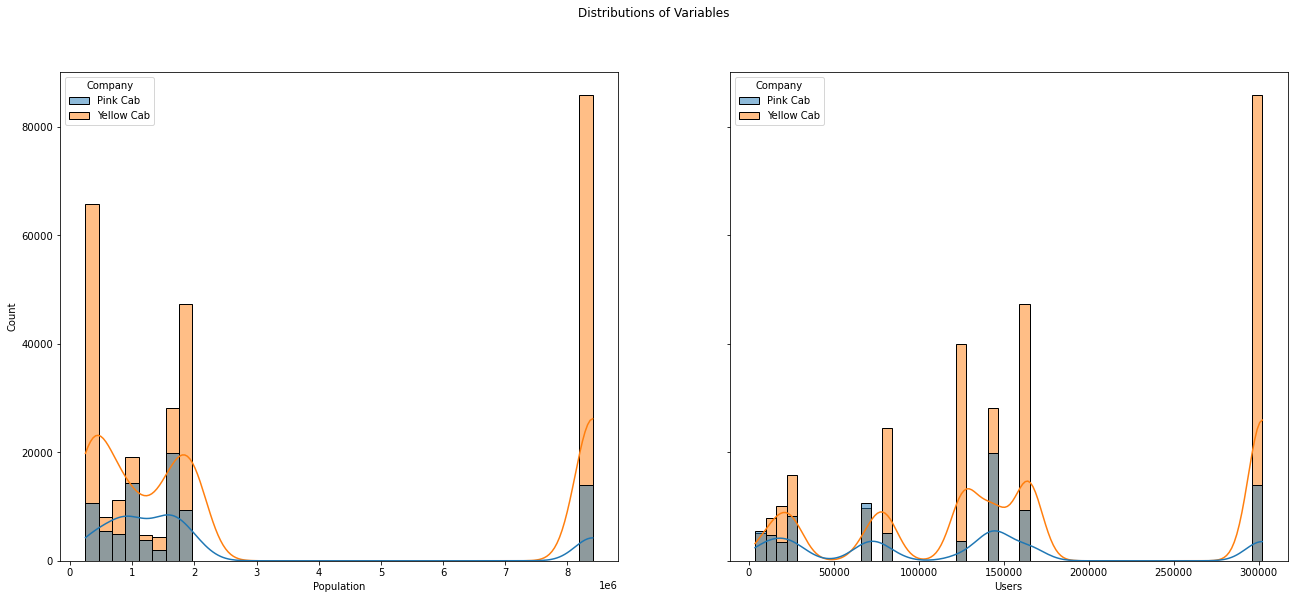

In [25]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 2 , figsize=(22 ,9), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=principal , x='Population' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=principal , x='Users' , kde = True , hue="Company")

Text(0, 0.5, 'Yellow Cab')

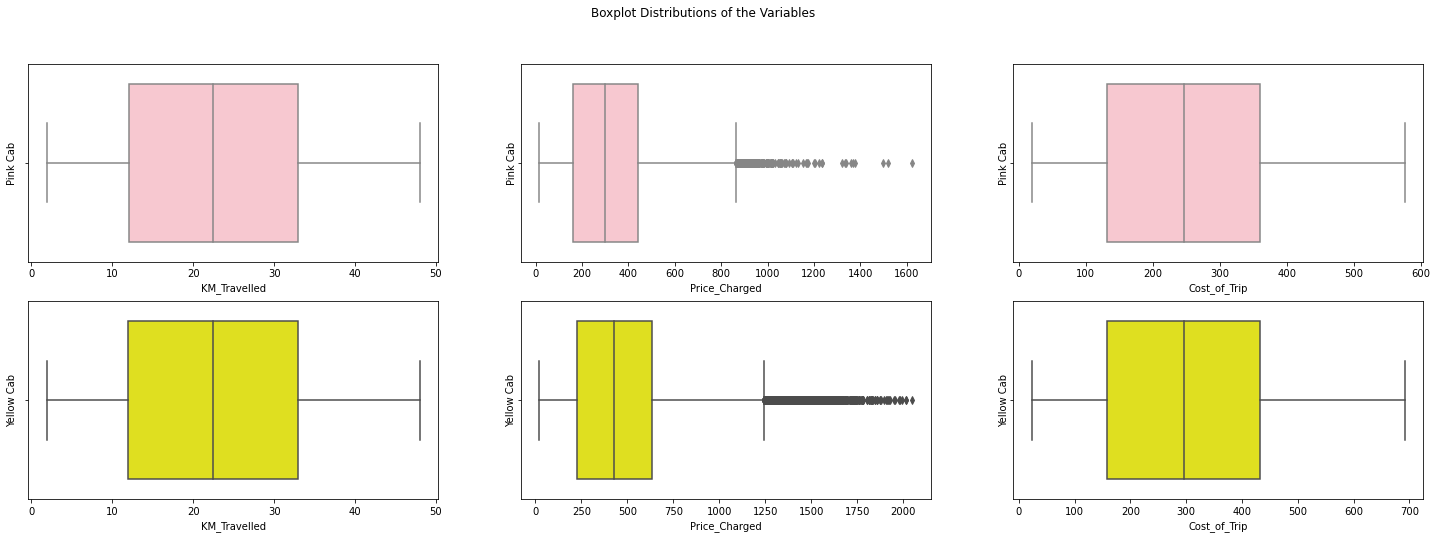

In [52]:
#Boxplot distributions of the desired variables were drawn.
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled' , color='pink',        data=pink ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged'   , color='pink',     data=pink  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' , color='pink',        data=pink ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM_Travelled' ,  color='yellow',      data=yellow ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price_Charged'   , color='yellow',     data=yellow ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,  color='yellow',      data=yellow ).set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

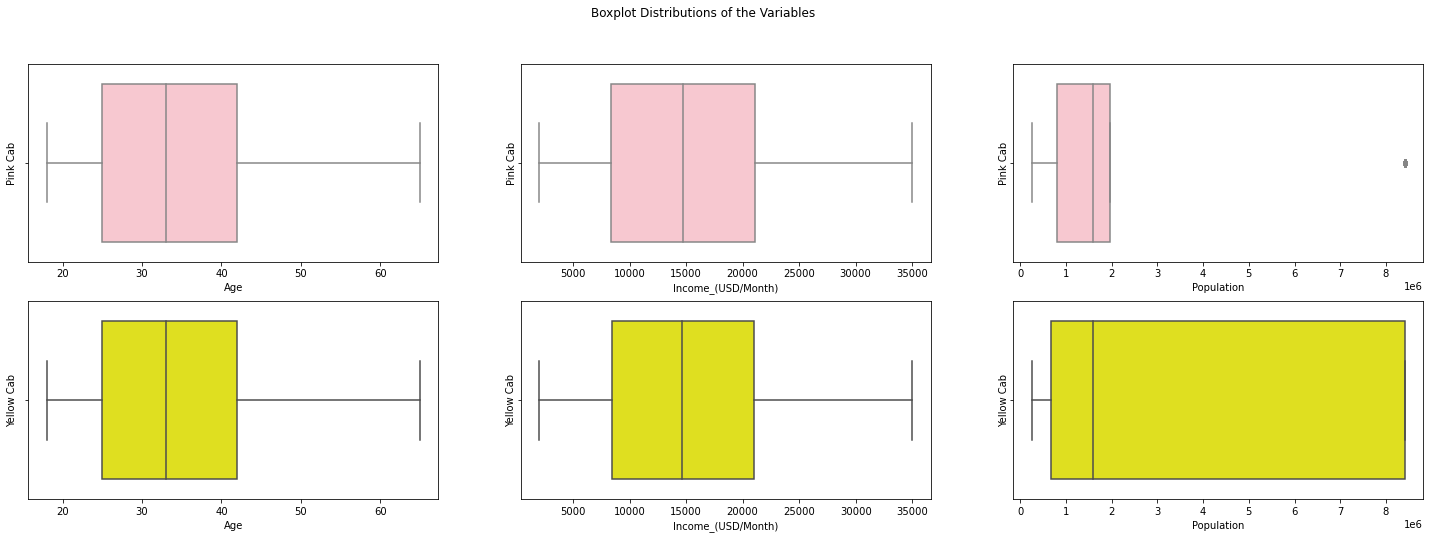

In [54]:
#Boxplot distributions of the desired variables were drawn.
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Age' ,  color='pink',                data=pink ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Income_(USD/Month)' ,color='pink',   data=pink  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Population' ,      color='pink',     data=pink ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Age' ,               color='yellow',  data=yellow ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)' ,color='yellow',  data=yellow  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Population' ,        color='yellow',  data=yellow ).set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

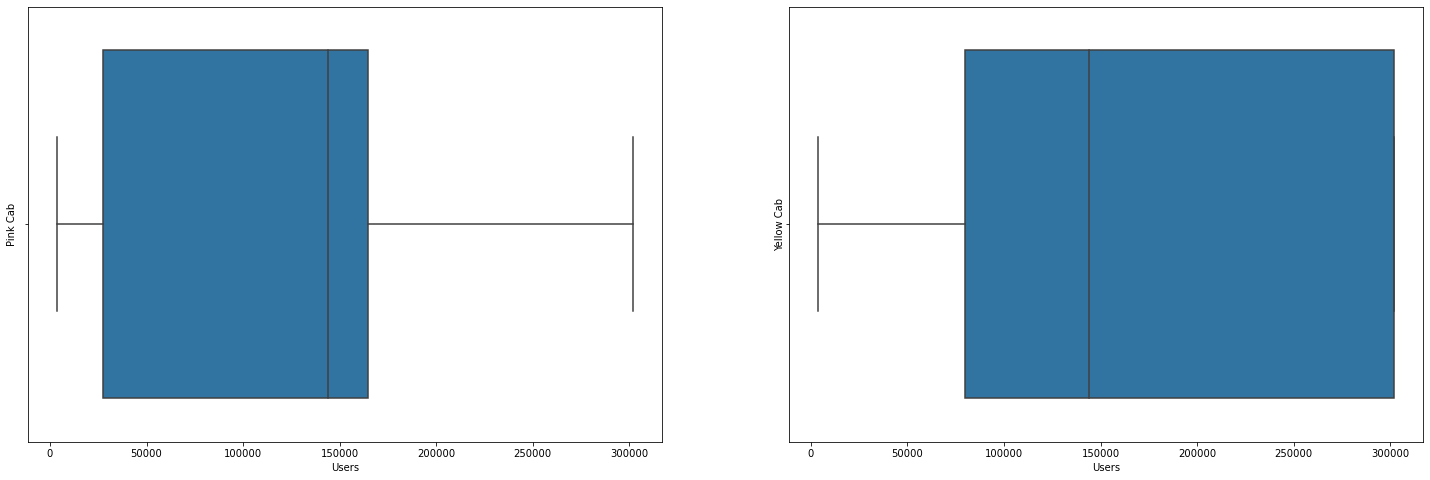

In [55]:
#Boxplot distributions of the desired variables were drawn.
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
sns.boxplot(ax=axes[0], x='Users' ,    data=pink ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1], x='Users'   ,  data=yellow  ) .set_ylabel("Yellow Cab")


<AxesSubplot:>

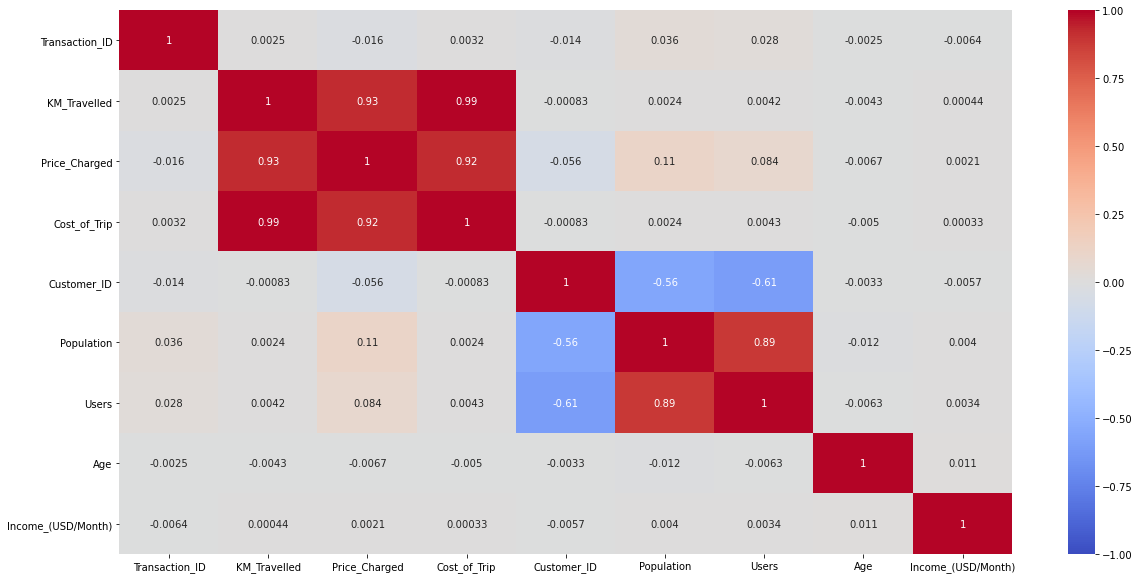

In [56]:
# Here visualized the correlation of MasterData features by heatmap for Pink Cab Firm.
Pink_Cab_Corr = pink.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Pink_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<AxesSubplot:>

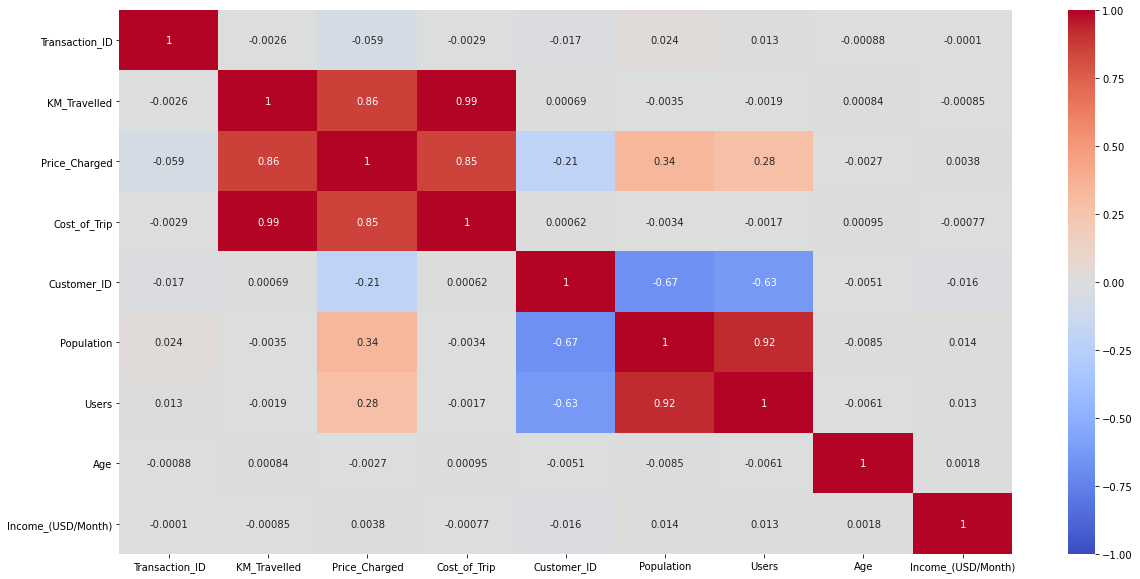

In [26]:
# Here visualized the correlation of MasterData features by heatmap for Pink Cab Firm.
Yellow_Cab_Corr = yellow.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Yellow_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

Text(0.5, 1.0, 'KM_Travelled  - Cost_of_Trip')

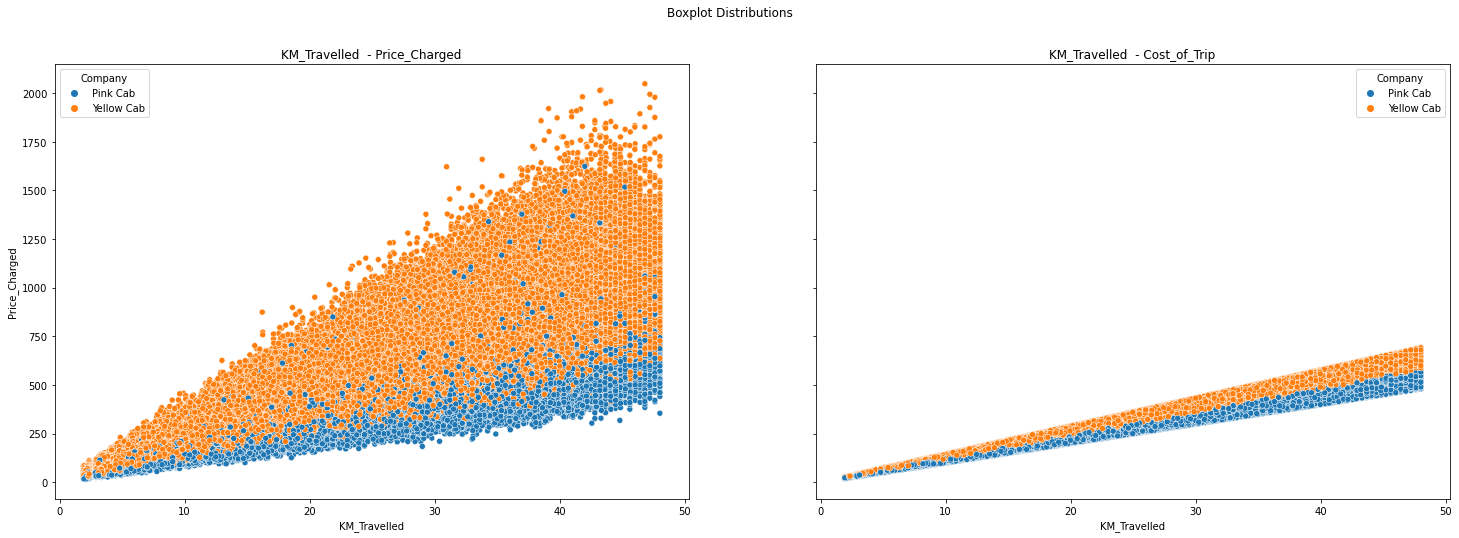

In [27]:
# Here visualized scatter plots of MasterData features to see correlations between them if exists
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(ax=axes[0],data=principal, x='KM_Travelled', y='Price_Charged' , hue="Company"  ).set_title("KM_Travelled  - Price_Charged")
sns.scatterplot(ax=axes[1],data=principal, x='KM_Travelled', y='Cost_of_Trip' , hue="Company").set_title("KM_Travelled  - Cost_of_Trip")

Text(0.5, 1.0, 'Price_Charged - Cost_of_Trip')

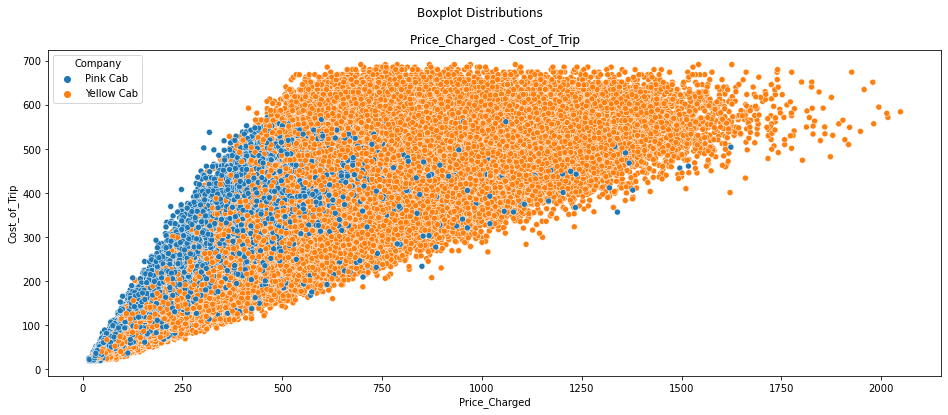

In [28]:
# Here visualized scatter plots of MasterData features to see correlations between them if exists
fig,axes = plt.subplots(figsize=(16, 6), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(data=principal, x='Price_Charged', y='Cost_of_Trip' , hue="Company").set_title("Price_Charged - Cost_of_Trip")